***Creator: Changhee Kang***

**Part 2 - Developing predictive model development**

**Note that:** data manupulation and exploration techniques illustrated in this demonstraton does not mean that the audience have to follow the same ways as shown here.

# Device Failure and Maintenance Prediction Model

It is to build a predictive model with diagnoses of telemetry attributes to classify whether maintenance should be performed on devices or not. The column used for prediction is set with the column name, "failure", with binary value 0 for "non-failure" and 1 for "failure". The goal is to minimize false positives and false negatives.

# Assumptions

As there is no meta data that describes the current dataset, assumptions can be applied to the current dataset. The dataset consists of diagnoses of telemetry attributes, so it might be rational that some variables are assumed to consist of *categorical nominal type values* while other variables would consist of *continuous type values*. 

# Roadmap

This part is to demonstrate the predictive model development with an imbalanced dataset. In this part, *'Oversampling'* method will be applied to the current dataset to inflate the number of data point in the minority class. 

Variable importance scores will be measures without sampling and with sampling to see how sampling affect the importances of variables.

The reason for applying *'Oversampling'* will be explained in detail. When developing the predictive model, a model development without cross-validation and with cross-validation will be compared to see the impact of cross-validation involvments in the predictive model development. Moreover, the right way of applying sampling techniques with cross-validation will also be discussed here. *'Random Oversampling'* is the sampling technique to be adopted to inflate the number of data points in the minority class of the dataset.

# Data Loading

import necessary python modules to load the current dataset into memory.

In [4]:
import pandas as pd
import numpy as np

Load the dataset into memory.

In [5]:
datafile = r'/home/thomas/Downloads/device_failure.csv'
dataset = pd.read_csv(datafile, sep=',', engine='python')

See if the dataset has been loaded correctly. There should be 12 columns meaning 12 variables. 

In [6]:
dataset.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


# Variable importances

- Without *'Oversampling'* applied.

In [11]:
# import ExtraTreesClassifier.
from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib to plot graphical statistics.
import matplotlib.pyplot as plt

In [12]:
# Test features for importances.
def examine_features(x_train, y_train):
    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
    forest.fit(x_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. attribute %d (%f)" % (f + 1, indices[f] + 1, importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.rcParams['figure.figsize'] = (18.0, 4.5)
    plt.figure()
    plt.title("Feature importance scores")
    plt.bar(range(X.shape[1]), importances[indices], color="red", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices+1)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
1. attribute 1 (0.278196)
2. attribute 6 (0.276792)
3. attribute 4 (0.123269)
4. attribute 2 (0.102534)
5. attribute 5 (0.082676)
6. attribute 7 (0.079533)
7. attribute 8 (0.044559)
8. attribute 3 (0.012441)


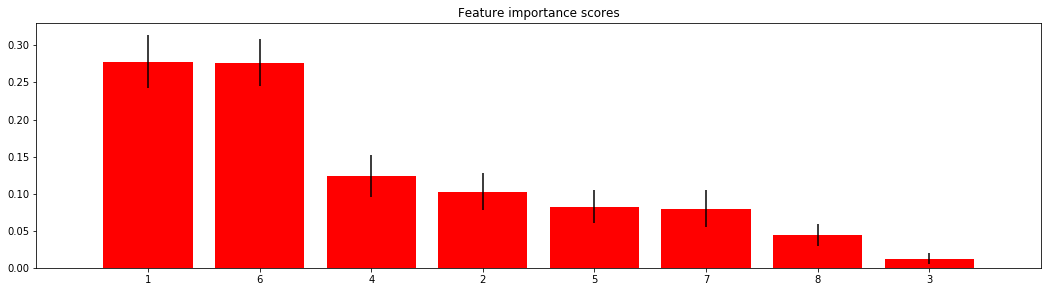

In [13]:
# Execute variable importance test with all the variables in the current dataset.
X = dataset[['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9']]
Y = dataset.failure
examine_features(X, Y)

- With *'Oversampling'* applied.

--- Before sampling ---
No. of non-failures: 124388	 No. of failures: 106

--- After random oversampling ---
date          248776
device        248776
failure       248776
attribute1    248776
attribute2    248776
attribute3    248776
attribute4    248776
attribute5    248776
attribute6    248776
attribute7    248776
attribute8    248776
attribute9    248776
dtype: int64
1    124388
0    124388
Name: failure, dtype: int64


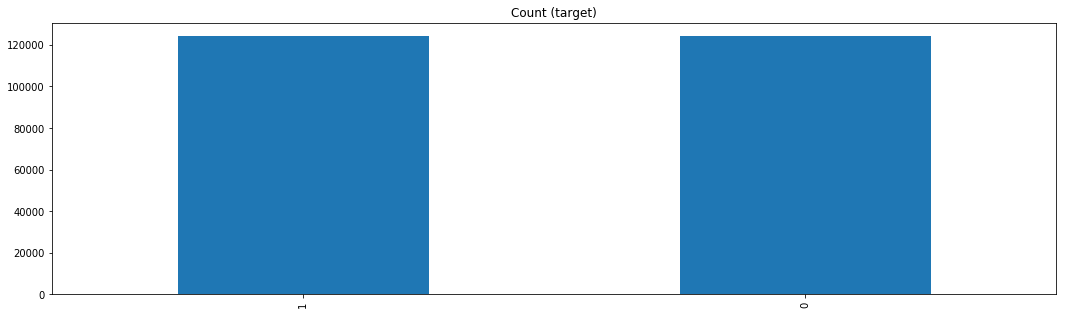

In [19]:
# Define class counts.
count_non_failure, count_failure = dataset.failure.value_counts()
print("--- Before sampling ---")
print("No. of non-failures: {}\t No. of failures: {}".format(count_non_failure, count_failure))
print()
print('--- After random oversampling ---')
# Divide by class.
df_failure = dataset[dataset['failure'] == 1]
df_non_failure = dataset[dataset['failure'] == 0]

# Apply random oversampling.
df_failure_over = df_failure.sample(count_non_failure, replace=True)

# Concatenate oversampled data with non_failure dataframe.
oversampled_dataset = pd.concat([df_non_failure, df_failure_over], axis=0)
print(oversampled_dataset.count())

plt.rcParams['figure.figsize'] = (18.0, 5.0)
print(oversampled_dataset.failure.value_counts())
oversampled_dataset.failure.value_counts().plot(kind='bar', title='Count (target)');

Feature importance test on oversampled dataset
Feature ranking:
1. attribute 4 (0.184371)
2. attribute 1 (0.181275)
3. attribute 6 (0.164470)
4. attribute 7 (0.148295)
5. attribute 2 (0.146123)
6. attribute 5 (0.123882)
7. attribute 8 (0.033429)
8. attribute 3 (0.018155)


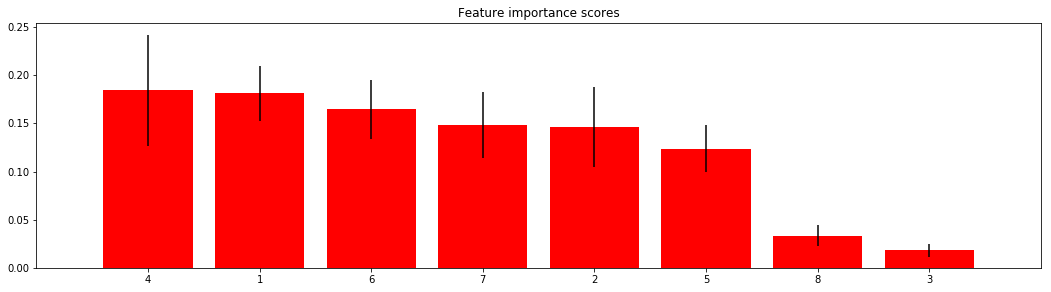

Feature importance test on original dataset
Feature ranking:
1. attribute 1 (0.278196)
2. attribute 6 (0.276792)
3. attribute 4 (0.123269)
4. attribute 2 (0.102534)
5. attribute 5 (0.082676)
6. attribute 7 (0.079533)
7. attribute 8 (0.044559)
8. attribute 3 (0.012441)


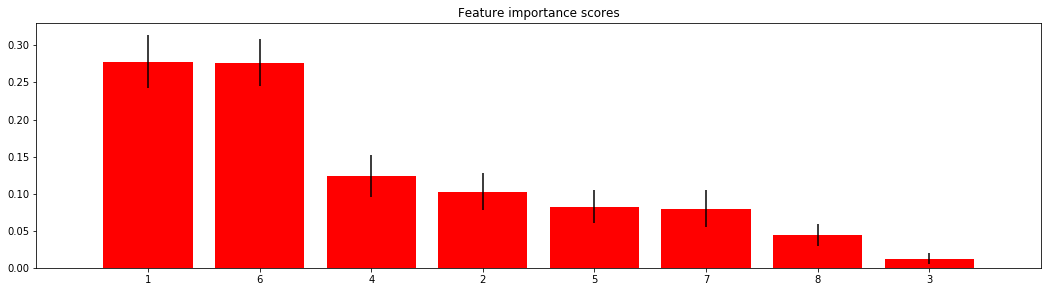

In [20]:
print("Feature importance test on oversampled dataset")
X = oversampled_dataset[['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9']]
Y = oversampled_dataset.failure
examine_features(X,Y)

print("Feature importance test on original dataset")
X = dataset[['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute9']]
Y = dataset.failure
examine_features(X,Y)